In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [82]:
school_shooting_keyword_trend = pd.read_csv('../../data/google_trends_school_shooting_keyword.csv')
school_shooting_keyword_trend.Month = pd.to_datetime(school_shooting_keyword_trend.Month)
school_shooting_keyword_trend.sort_values(by=['Month'], ascending=True, inplace=True)

In [27]:
peaks = school_shooting_keyword_trend.nlargest(3, columns=['school shooting: (Worldwide)'])

In [3]:
import requests
from tempfile import NamedTemporaryFile
font_url = 'https://github.com/google/fonts/blob/main/ofl/rubik/Rubik%5Bwght%5D.ttf' + '?raw=true'

response = requests.get(font_url)
with NamedTemporaryFile(delete=False, suffix='.ttf') as f:
    f.write(response.content)
    
    fm.fontManager.addfont(f.name)
    prop = fm.FontProperties(fname=f.name)
    print(f"Added new font to matplotlib with name {prop.get_name()} of {prop.get_family()}")

Added new font to matplotlib with name Rubik of ['sans-serif']


In [54]:
color_dark = '#000000'
color_light = '#FFFFFF'
color_dark_accent = '#14213D'
color_light_accent = '#E5E5E5'
color_highlight = '#FCA311'

mpl_runtime_config_context = {
    'axes.prop_cycle': f"cycler('color', ['{color_highlight}', '{color_dark_accent}',])",
    # 'lines.color': 'C0',
    'font.family': 'Rubik',
    # 'font.sans-serif': 'Rubik'
    }


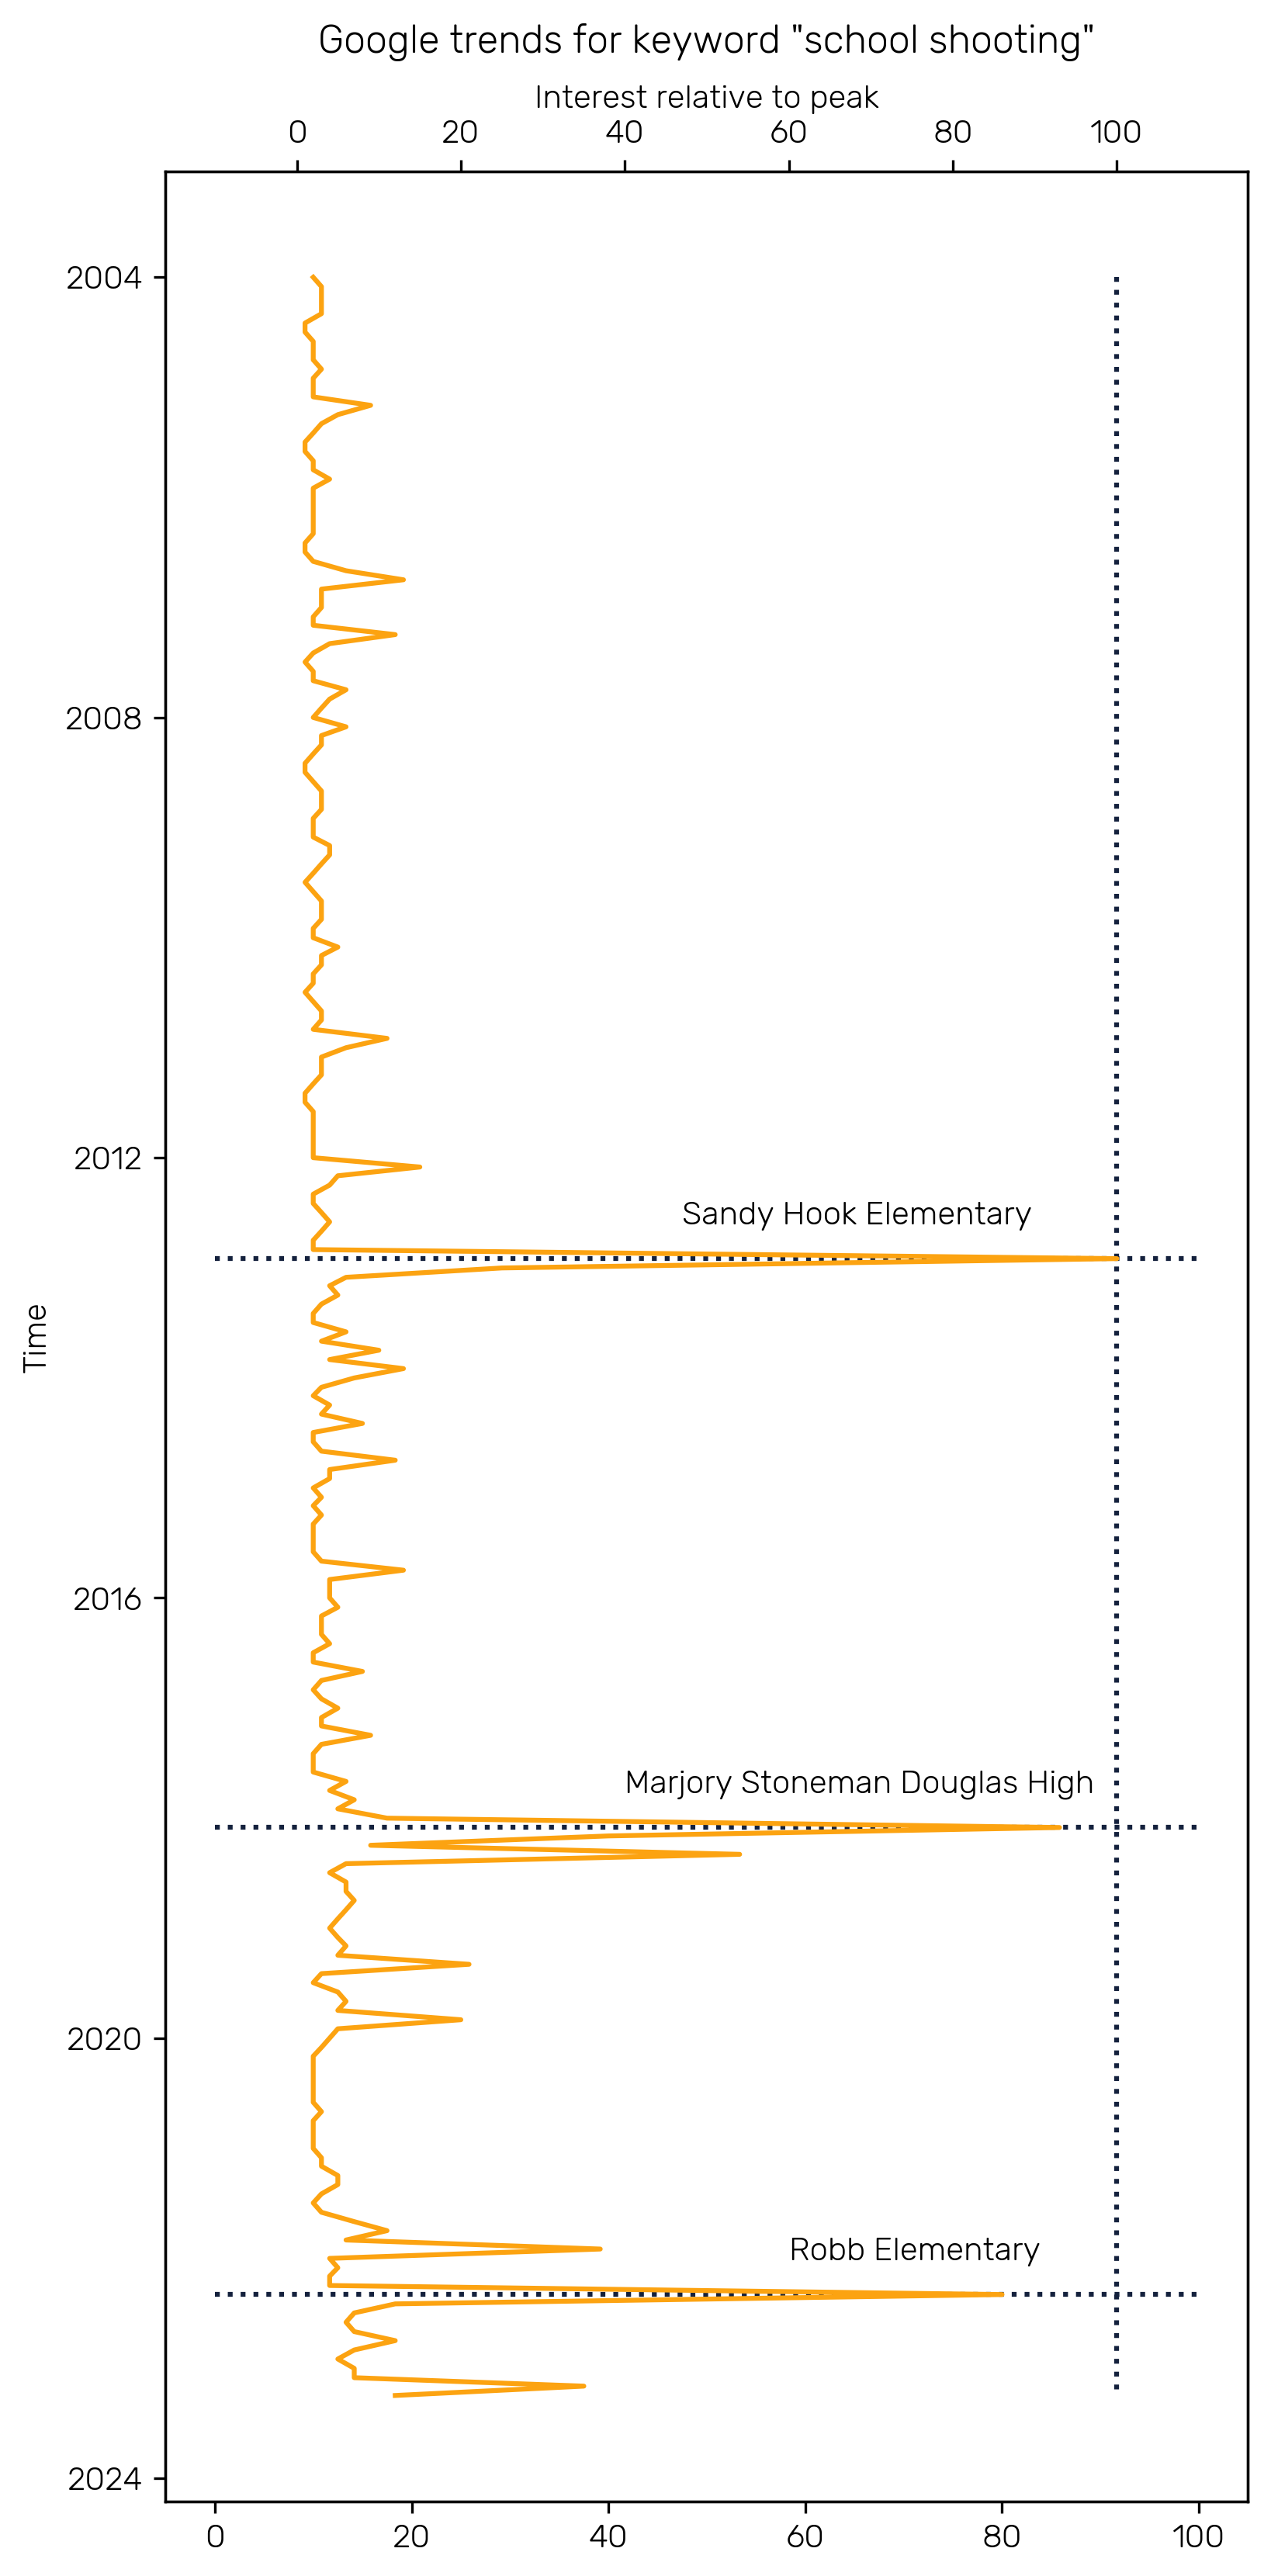

In [194]:
with plt.rc_context(mpl_runtime_config_context):
    fig = plt.figure(figsize=(6, 13), dpi=300)
    plt.title('Google trends for keyword "school shooting"', pad=10)

    plt.gca().invert_yaxis()
    plt.ylabel('Time')

    # plt.xlabel('Interest relative to peak')
    plt.xlim((-5, 105))
    ax = plt.twiny()
    ax.set_xlabel("Interest relative to peak")

    plt.vlines(100, ymin=school_shooting_keyword_trend.Month.min(), ymax=school_shooting_keyword_trend.Month.max(), colors=[color_dark_accent], linestyles=['dotted'])
    plt.hlines(peaks.Month, xmin=-10, xmax=110, colors=[color_dark_accent], linestyles=['dotted'])
    plt.plot(school_shooting_keyword_trend['school shooting: (Worldwide)'], school_shooting_keyword_trend.Month)

    plt.text(x=47, y=pd.Timestamp.fromtimestamp(peaks.iloc[0, 0].timestamp() - 10000000), s="Sandy Hook Elementary")
    plt.text(x=40, y=pd.Timestamp.fromtimestamp(peaks.iloc[1, 0].timestamp() - 10000000), s="Marjory Stoneman Douglas High")
    plt.text(x=60, y=pd.Timestamp.fromtimestamp(peaks.iloc[2, 0].timestamp() - 10000000), s="Robb Elementary")

In [199]:
fig.savefig("../docs/assets/imgs/google_trends.png", bbox_inches='tight')